In [1]:
#! /usr/bin/env python
# -*- coding: utf-8 -*-
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('experimental_data.csv', sep=',', encoding = 'ISO-8859-1')

df.insert(1, 'LogCONC', np.log10(df.CONC))
df.insert(3, 'LogMW', np.log10(df.MW))

df

,CONC,LogCONC,MW,LogMW,SN
0,0.2,-0.698970,800,2.903090,1.218746
1,0.4,-0.397940,800,2.903090,1.292975
2,0.6,-0.221849,800,2.903090,1.900966
3,1.0,0.000000,800,2.903090,2.604295
4,2.0,0.301030,800,2.903090,1.438657
5,0.2,-0.698970,2000,3.301030,1.779388
6,0.4,-0.397940,2000,3.301030,1.292393
7,0.6,-0.221849,2000,3.301030,1.102531
8,1.0,0.000000,2000,3.301030,1.013238
9,2.0,0.301030,2000,3.301030,0.998044


<Figure size 1500x1500 with 0 Axes>

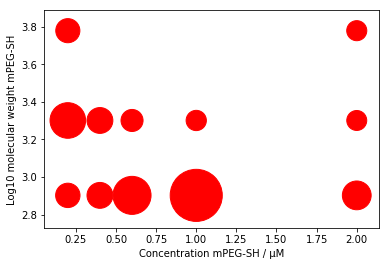

In [2]:
import matplotlib

plt.figure(figsize=[5,5], dpi=300)

plt = df.plot.scatter(x='CONC', y='LogMW', s=df['SN']*df['SN']*400, color='r')
plt.set_xlabel('Concentration mPEG-SH / µM')
plt.set_ylabel('Log10 molecular weight mPEG-SH');

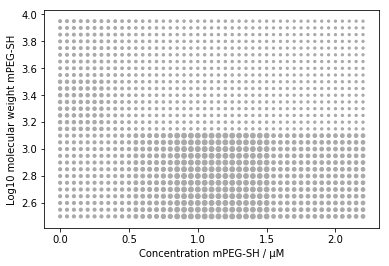

In [3]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import itertools

X = df.filter(['CONC','LogMW'], axis=1)
y = df.SN

xc = np.arange(0.0, 2.25, 0.05)
yc = np.arange(2.5, 4.0, 0.05)

# This one for log10 conc mPEH-SH / µM
#xc = np.arange(-1.0, 0.5, 0.05)
#yc = np.arange(2.5, 4.0, 0.05)

t = []
for r in itertools.product(xc, yc): t.append((r[0] , r[1]))
predictions = pd.DataFrame(data=t, columns=['CONC', 'LogMW'])

forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X, y)

y_pred = forest.predict(predictions)

predictions.insert(2, 'y_pred', y_pred)


plt = predictions.plot.scatter(x='CONC', y='LogMW', s=np.square(y_pred/np.mean(y_pred))*10, color='darkgrey')
plt.set_xlabel('Concentration mPEG-SH / µM')
plt.set_ylabel('Log10 molecular weight mPEG-SH');

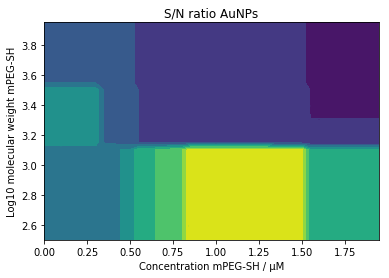

In [4]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

def ML_function(X, Y):
    return forest.predict([[X, Y]])

    
delta = 0.05
x = np.arange(0.0, 2.0, delta)
y = np.arange(2.5, 4.0, delta)

# This one for log10 conc mPEH-SH / µM
#x = np.arange(-1.0, 0.5, delta)
#y = np.arange(2.5, 4.0, delta)

X, Y = np.meshgrid(x, y)

vfunc = np.vectorize(ML_function)
Z = vfunc(X, Y)

plt.figure()
CS = plt.contourf(X, Y, Z)
plt.clabel(CS, inline=0, fontsize=0)
plt.xlabel('Concentration mPEG-SH / µM')
plt.ylabel('Log10 molecular weight mPEG-SH')
plt.title('S/N ratio AuNPs');